# TC-ADC-I: TEST-ADC-VAL 

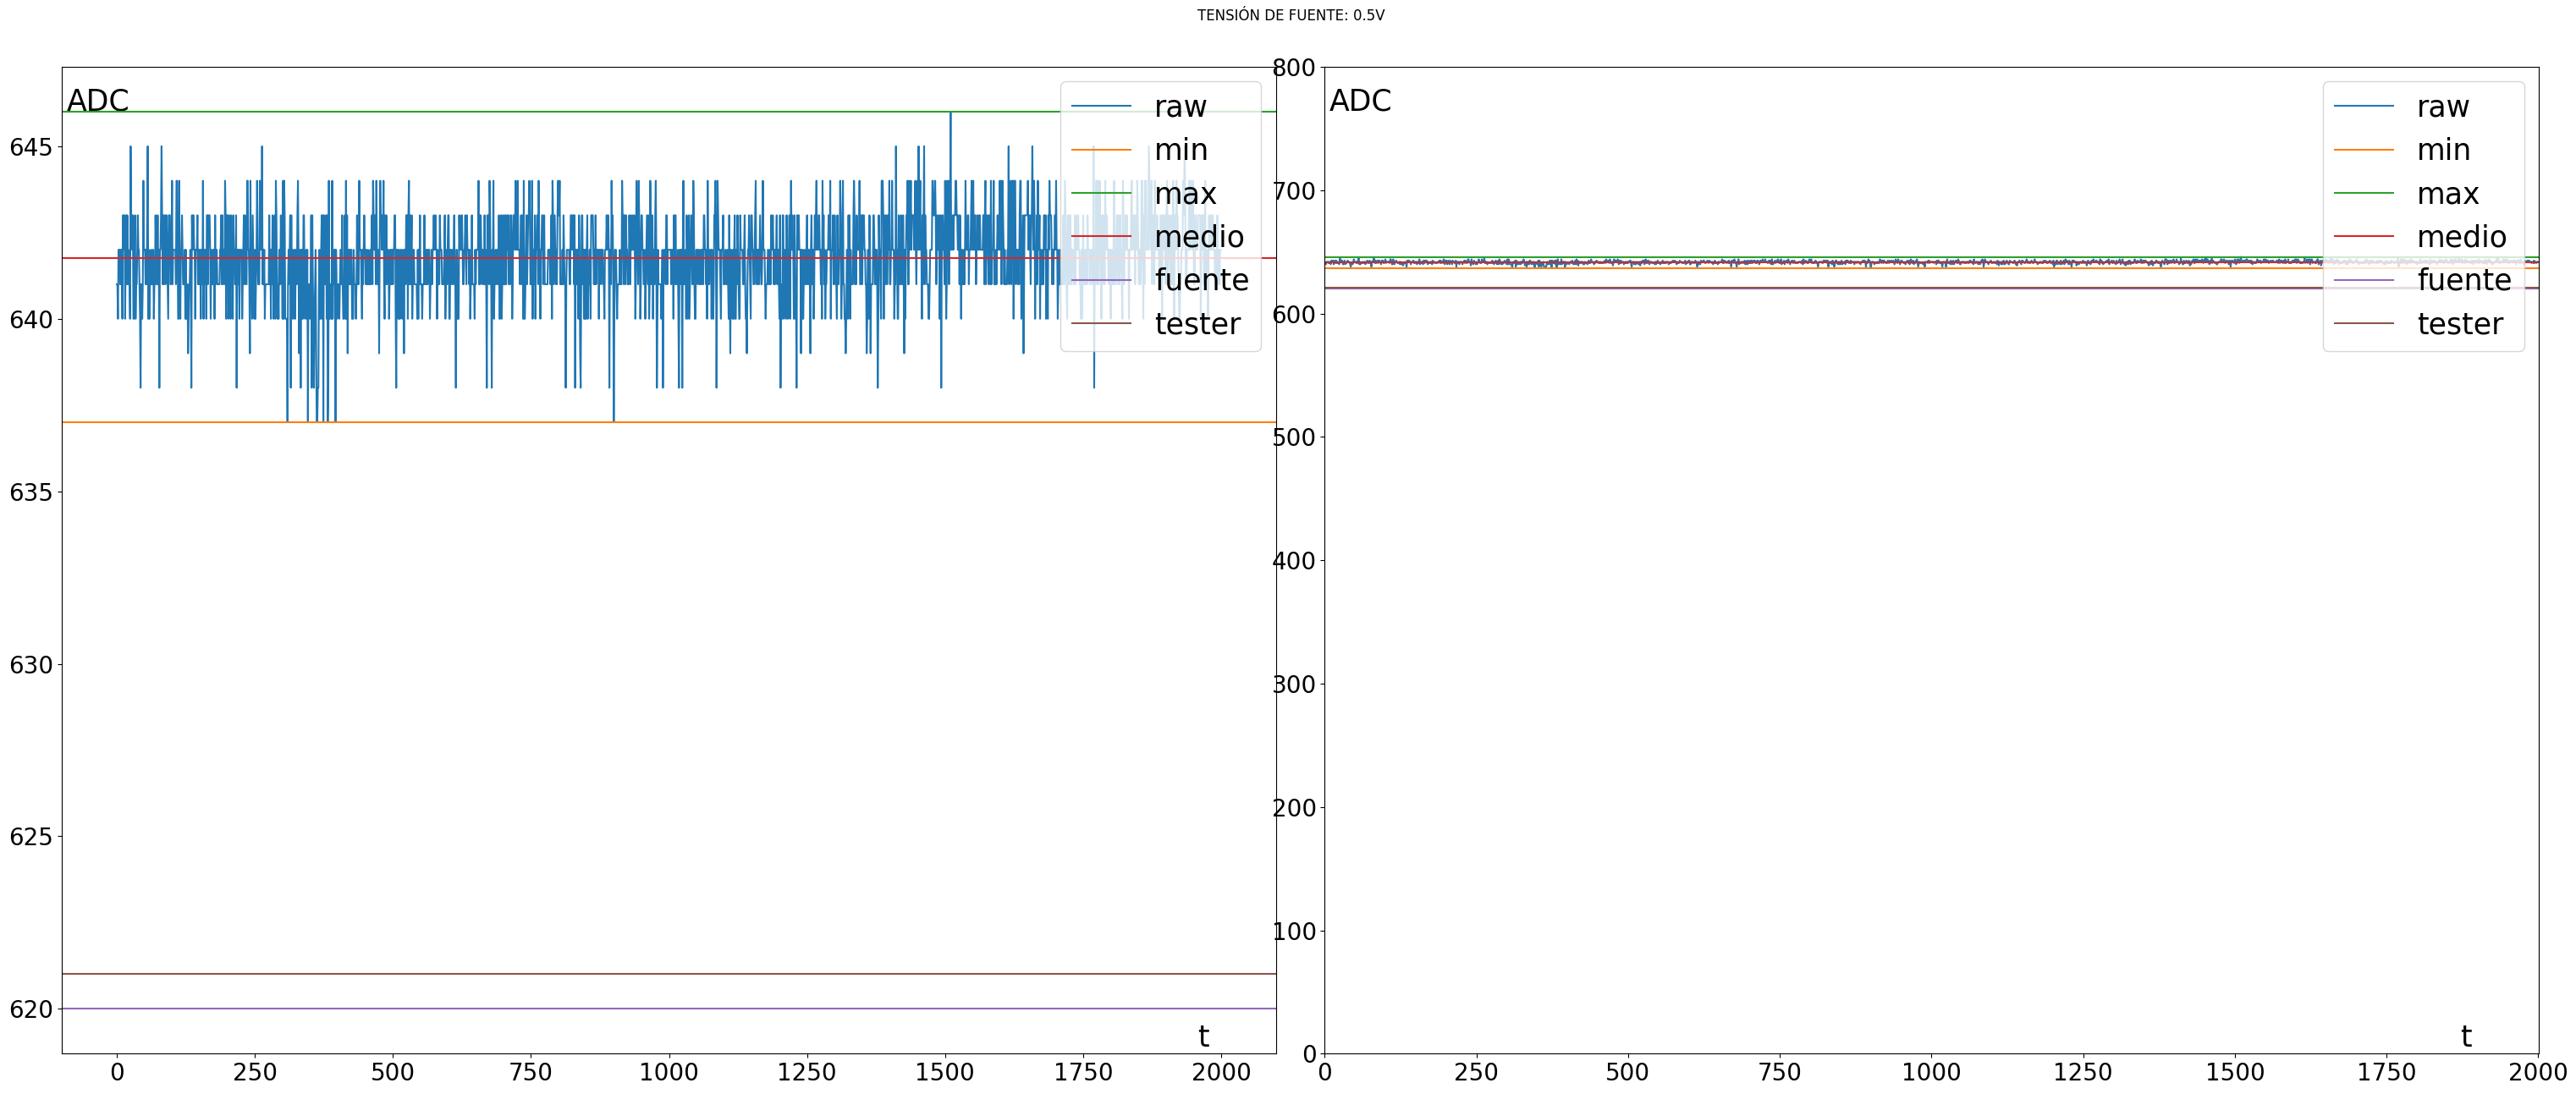

In [57]:
from IPython.display import Markdown as md
import numpy as np 
import numpy as np
import matplotlib.pylab as plt
### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v
## PARAMETERS OF ANALISIS ADC TEST REPORT 
path_file = '../../../results/TC-I-ADC/'
list_files_tcI=['TC-I-ADC-0.5.txt','TC-I-ADC-0.75.txt','TC-I-ADC-1.0.txt','TC-I-ADC-1.5.txt','TC-I-ADC-2.0.txt','TC-I-ADC-2.75.txt', 'TC-I-ADC-3.3.txt']
voltage_tester = [0.501,0.752,1.003,1.504,2.000,2.7500,3.300] 
voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]
NBITS = 12 
MAX_VALUE = 2**12-1 
SOURCE_ADC_VOLTAGE = 3.3 #MEASURE OF GND
measure_data = np.zeros((2000,len(list_files_tcI)),dtype=int)
measure_data_hex = np.zeros((2000,len(list_files_tcI)),dtype=int)

### Values of compute of script 
##  Expected values compute 
## position indicate a file using a list_files_tcI
ADC_voltage_expected_tester = []
ADC_voltage_expected_source = []
ADC_mean_samples = []
ADC_max_sample = []
ADC_min_sample = [] 
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 


for i in range(0,len(voltage_tester)):
    ADC_voltage_expected_tester.append(int( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_tester[i]))
    ADC_voltage_expected_source.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    

### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
for file in list_files_tcI:    
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(x, 16) for x in d1])
    d2 =d2.astype(int) 
    measure_data[:,i] = d2 
    measure_data_hex[:,i] = d1 
    ADC_mean_samples.append(np.mean(d2))
    ADC_max_sample.append(np.amax(d2))
    ADC_min_sample.append(np.amin(d2))
    i = i +1 

    
 ### FIGURE CREATE AND DRAWING DATA 
fig05, ax05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
#fig075, ax075 = plt.subplots(nrows=1, ncols=2)
fig05.suptitle('TENSIÓN DE FUENTE: 0.5V\n\n')
fig05.tight_layout()

              
              
#### SOURCE OF 0.5V               

l1=ax05[0].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[0].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[0].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[0].axhline(y=ADC_mean_samples[0],label='medio',color ='#d62728')
l5=ax05[0].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[0].axhline(y=ADC_voltage_expected_tester[0],label='tester',color= '#8c564b')
ax05[0].legend(loc='upper right',fontsize=25)
ax05[0].set_xlabel('t',fontsize = 25) 
ax05[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax05[0].tick_params(axis='both', which='major', labelsize=20)
ax05[0].xaxis.set_label_coords(0.94,0.03)
ax05[0].yaxis.set_label_coords(0.03,0.95)
l1=ax05[1].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[1].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[1].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[1].axhline(y=ADC_mean_samples[0],label='medio',color='#d62728')
l5=ax05[1].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[1].axhline(y=ADC_voltage_expected_tester[0],label='tester',color = '#8c564b')
ax05[1].legend(loc='upper right',fontsize=25)                         
ax05[1].tick_params(axis='both', which='major',labelsize=20) 
ax05[1].set_xlabel('t',fontsize = 25) 
ax05[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax05[1].set_xlim([0,2001]) 
ax05[1].set_ylim([0,800]) 
ax05[1].xaxis.set_label_coords(0.94,0.03)
ax05[1].yaxis.set_label_coords(0.03,0.95)
fig05.savefig('TC-ADC-0.5.jpg') 


### SOURCE OF 0.75 V 


In [ ]:
#from IPython.display import HTML
#html_code ="""
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:25;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:35px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-bq5v{border-color:inherit;font-size:28px;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-bq5v" colspan="3">hola</th>
    <th class="tg-bq5v">a</th>
    <th class="tg-bq5v">b</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-bq5v">c</td>
    <td class="tg-bq5v">%s</td>
    <td class="tg-bq5v">%s</td>
    <td class="tg-bq5v">c</td>
    <td class="tg-bq5v">as</td>
  </tr>
  <tr>
    <td class="tg-bq5v">as</td>
    <td class="tg-bq5v">as</td>
    <td class="tg-bq5v">as</td>
    <td class="tg-bq5v">as</td>
    <td class="tg-bq5v">as</td>
  </tr>
</tbody>
</table> %(10,20)
""" %(a,b)  

HTML(html_code)"""

{{a}}

# TC-ADC-II: Test reference 

In [ ]:
# VALIDACIÓN DEL ANGULO 
